NAME - Arpita Nema

Student ID -202116004

NOTE : Dataset path - /content/drive/MyDrive/RS/LA_01_Dataset

Link to folder RS - https://drive.google.com/drive/folders/1HyCFjaBI6-Z-NqOtwf9x3e_l9tkYdI_v?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install numpy
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630079 sha256=89b5d3737dfe7ffea3d08220a840895f3c4bd55780bcb71f14d87e39689777e2
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [4]:
import surprise
from surprise import Dataset
import pandas as pd
from surprise import Reader
import numpy as np

#Reading CSV Files

In [5]:
interactions_train_csv= pd.read_csv('/content/drive/MyDrive/RS/LA_01_Dataset/interactions_train.csv')
interactions_train_csv

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


In [6]:
interactions_test_csv= pd.read_csv('/content/drive/MyDrive/RS/LA_01_Dataset/interactions_test.csv')
interactions_test_csv

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935
...,...,...,...,...,...,...
12450,101053,179011,2009-01-03,5.0,25054,130258
12451,252205,81398,2005-12-26,2.0,25055,152255
12452,624305,142984,2011-01-15,1.0,25057,139864
12453,173575,104842,2004-12-18,3.0,25059,140646


In [7]:
pp_recipes_csv= pd.read_csv('/content/drive/MyDrive/RS/LA_01_Dataset/PP_recipes.csv')
pp_recipes_csv

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


In [8]:
pp_users_csv= pd.read_csv('/content/drive/MyDrive/RS/LA_01_Dataset/PP_users.csv')
pp_users_csv

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...,...
25071,25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2
25074,25074,"[2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[157808, 159896]",2,"[5.0, 5.0]",2


#Dataset Analysis

In [9]:
print("Number of users ", pp_users_csv.shape[0])
print("Number of items (recipes) ", pp_recipes_csv.shape[0])


Number of users  25076
Number of items (recipes)  178265


Per recipe -> Count | Max_rating | Min_rating | Avg_rating

In [10]:
per_recipe_rating_count = pd.DataFrame(interactions_train_csv.groupby('recipe_id')['rating'].count(), columns=["rating"] )
per_recipe_rating_count=per_recipe_rating_count.rename(columns={'rating':'rating_count'})


In [11]:
per_recipe_rating_max = pd.DataFrame(interactions_train_csv.groupby('recipe_id')['rating'].max(), columns=["rating"] )
per_recipe_rating_max=per_recipe_rating_max.rename(columns={'rating':'max_rating'})


In [12]:
per_recipe_rating_min = pd.DataFrame(interactions_train_csv.groupby('recipe_id')['rating'].min(), columns=["rating"] )
per_recipe_rating_min=per_recipe_rating_min.rename(columns={'rating':'min_rating'})


In [13]:
per_recipe_rating_avg = pd.DataFrame(interactions_train_csv.groupby('recipe_id')['rating'].mean(), columns=["rating"] )
per_recipe_rating_avg=per_recipe_rating_avg.rename(columns={'rating':'avg_rating'})


In [14]:
recipe_summary_df = per_recipe_rating_count.merge(per_recipe_rating_max,on='recipe_id')\
                    .merge(per_recipe_rating_min,on='recipe_id')\
                    .merge(per_recipe_rating_avg,on='recipe_id')
recipe_summary_df

,rating_count,max_rating,min_rating,avg_rating
recipe_id,,,,
38,3,5.0,4.0,4.333333
40,5,5.0,4.0,4.800000
45,2,5.0,3.0,4.000000
46,2,5.0,5.0,5.000000
49,12,5.0,0.0,4.000000
...,...,...,...,...
536729,4,5.0,4.0,4.750000
536990,1,5.0,5.0,5.000000
537175,1,5.0,5.0,5.000000


### 5 Most Rated Recipes 

In [15]:
print(per_recipe_rating_count.sort_values('rating_count', ascending=False ).head(5))

           rating_count
recipe_id              
27208              1091
89204              1075
32204               897
39087               894
69173               787


### 5 least Rated Recipes 

In [16]:
print(per_recipe_rating_count.sort_values('rating_count', ascending=True ).head(5))

           rating_count
recipe_id              
537458                1
145956                1
335920                1
145953                1
145946                1


### Rating Distribution Plot

In [17]:
import plotly.graph_objects as go

data = interactions_train_csv['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values /interactions_train_csv.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} recipe ratings'.format(interactions_train_csv.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))

fig = go.Figure(
    data=[trace], layout=layout
)
fig.show(renderer="colab")

#Generating TrainDF and TestDF in required format

In [18]:
TrainDF=interactions_train_csv[['user_id', 'recipe_id','rating']]
TrainDF
                                 

,user_id,recipe_id,rating
0,2046,4684,5.0
1,2046,517,5.0
2,1773,7435,5.0
3,1773,278,4.0
4,2046,3431,5.0
...,...,...,...
698896,926904,457971,5.0
698897,2002312797,27208,5.0
698898,1290903,131607,5.0
698899,226867,363072,5.0


In [19]:
TestDF=interactions_test_csv[['user_id', 'recipe_id','rating']]
TestDF

,user_id,recipe_id,rating
0,8937,44551,4.0
1,56680,126118,4.0
2,349752,219596,0.0
3,628951,82783,2.0
4,92816,435013,3.0
...,...,...,...
12450,101053,179011,5.0
12451,252205,81398,2.0
12452,624305,142984,1.0
12453,173575,104842,3.0


#Normalization Techniques

###reducing size of TrainDF
To ensure statistical significance, users with less than 10 ratings, and recipes with less than 10 ratings are excluded.

In [20]:
reduced_cnt1 = TrainDF['user_id'].value_counts()
TrainDF_New = TrainDF[TrainDF['user_id'].isin(reduced_cnt1[reduced_cnt1 >= 10].index)]

reduced_cnt2 = TrainDF_New['recipe_id'].value_counts()
TrainDF_New = TrainDF_New[TrainDF_New['recipe_id'].isin(reduced_cnt2[reduced_cnt2 >= 10].index)]

In [21]:
TrainDF_New

,user_id,recipe_id,rating
20,5523,2713,4.0
21,5523,7695,1.0
28,6406,8486,4.0
32,6702,536,3.0
35,2312,2886,5.0
...,...,...,...
698887,146742,278872,5.0
698889,2001513060,367414,1.0
698891,2001513060,192495,5.0
698895,454804,20713,0.0


In [22]:
print("Distint user count in shrinked TrainDF" , len(np.unique(TrainDF_New["user_id"])))
print("Distint recipe count in shrinked TrainDF" , len(np.unique(TrainDF_New["recipe_id"])))

Distint user count in shrinked TrainDF 9274
Distint recipe count in shrinked TrainDF 11439


In [23]:
import plotly.graph_objects as go

data = TrainDF_New['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values /TrainDF_New.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'New Distribution Of {} recipe ratings'.format(TrainDF_New.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))

fig = go.Figure(
    data=[trace], layout=layout
)
fig.show(renderer="colab")

In [24]:
reader = Reader(rating_scale=(1, 5))

In [29]:
Train_Data= Dataset.load_from_df(TrainDF_New[['user_id', 'recipe_id','rating']], reader)
Train_Data

Building Dataset from full train set 

In [30]:
Train_Data.build_full_trainset()

In [ ]:
TestSet=list(TestDF.itertuples(index=False, name=None))
TestSet

In [32]:
from surprise.model_selection import GridSearchCV
from surprise import KNNWithMeans, KNNWithZScore, KNNBasic
from surprise import accuracy
import matplotlib.pyplot as plt

In [35]:
K_list=[20, 50 , 120, 200, 550]     #[x for x in range(10,50+1,10)]
#K_list

In [36]:
FOLD_CNT=5

In [37]:
param_grid_normalization = {'k': K_list,
              'sim_options': {'name':  ['cosine'],                            
                              'user_based': [True]
                             }
              }

print(param_grid_normalization)

{'k': [20, 50, 120, 200, 550], 'sim_options': {'name': ['cosine'], 'user_based': [True]}}


KNN with Mean Centering Normalization

In [38]:
gs_mean_centering = GridSearchCV(KNNWithMeans, param_grid_normalization, measures=['rmse'], cv=FOLD_CNT, refit=True)
gs_mean_centering.fit(Train_Data)

Computing the cosine similarity matrix...


/usr/local/lib/python3.7/dist-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning:

invalid value encountered in double_scalars



Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computi

In [ ]:
#Testing will happen with best parameters as refit is set to "True"
gs_mean_centering_predictions = gs_mean_centering.test(TestSet, verbose=True)


In [45]:
print("RMSE on Test Set ", accuracy.rmse(gs_mean_centering_predictions, verbose=False))

RMSE on Test Set  1.4020951548368843


In [ ]:
gs_mean_all_predictions = [round(pred_rating[3]) for pred_rating in gs_mean_centering_predictions]
gs_mean_all_org_ratings = [pred_rating[2] for pred_rating in gs_mean_centering_predictions]

#plt.hist(gs_mean_all_predictions, bins=list(range(0,6)))


In [ ]:
#plt.hist(gs_mean_all_org_ratings, bins=list(range(0,6)))


In [43]:
print(gs_mean_centering.cv_results)
print("Best RMSE score (Mean Centering) ", gs_mean_centering.best_score['rmse'])
print(" K parameter that gave the best RMSE score (Mean Centering)",gs_mean_centering.best_params['rmse'])


{'split0_test_rmse': array([0.90560563, 0.90364542, 0.90326392, 0.90316743, 0.90315866]), 'split1_test_rmse': array([0.91794704, 0.91571901, 0.91544768, 0.91543332, 0.91543752]), 'split2_test_rmse': array([0.9079441 , 0.90631657, 0.9062757 , 0.90618661, 0.90617063]), 'split3_test_rmse': array([0.89848888, 0.89636618, 0.89630833, 0.89623651, 0.89623808]), 'split4_test_rmse': array([0.91366151, 0.91100515, 0.91078073, 0.91075455, 0.91076413]), 'mean_test_rmse': array([0.90872943, 0.90661047, 0.90641527, 0.90635568, 0.9063538 ]), 'std_test_rmse': array([0.00670125, 0.00657422, 0.00652292, 0.00654744, 0.00655035]), 'rank_test_rmse': array([5, 4, 3, 2, 1]), 'mean_fit_time': array([9.9843195 , 9.57894158, 9.3463881 , 9.3191288 , 9.35677266]), 'std_fit_time': array([0.48679503, 0.37379039, 0.14894059, 0.04890601, 0.08505045]), 'mean_test_time': array([4.69219518, 4.88421493, 5.17336736, 5.12080541, 4.89325428]), 'std_test_time': array([0.2139469 , 0.18261926, 0.12991192, 0.18234309, 0.1470888

In [44]:
#Storing for plotting
gs_mean_centering_mean_test_rmse=gs_mean_centering.cv_results['mean_test_rmse']

KNN with Z-score Normalization

In [46]:
gs_z_score = GridSearchCV(KNNWithZScore, param_grid_normalization, measures=['rmse'], cv=FOLD_CNT, refit=True)
gs_z_score.fit(Train_Data)

Computing the cosine similarity matrix...


/usr/local/lib/python3.7/dist-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning:

invalid value encountered in double_scalars



Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computi

In [ ]:
#Testing will happen with best parameters as refit is set to "True"
gs_z_score_predictions = gs_z_score.test(TestSet, verbose=True)


In [48]:
print("RMSE for Test Set ", accuracy.rmse(gs_z_score_predictions, verbose=False))

RMSE for Test Set  1.4020951548368843


In [49]:
print(gs_z_score.cv_results)
print("Best RMSE score (Z-score) ", gs_z_score.best_score['rmse'])
print(" K parameter that gave the best RMSE score (Z-score)",gs_z_score.best_params['rmse'])


{'split0_test_rmse': array([0.90882734, 0.90634984, 0.90624893, 0.90625246, 0.90627812]), 'split1_test_rmse': array([0.92363872, 0.92141633, 0.92121253, 0.92111112, 0.92110481]), 'split2_test_rmse': array([0.92370468, 0.92085933, 0.92053076, 0.920556  , 0.92057062]), 'split3_test_rmse': array([0.91821495, 0.91619949, 0.91572982, 0.91567018, 0.91568797]), 'split4_test_rmse': array([0.91731357, 0.91585277, 0.91539401, 0.91529883, 0.91535357]), 'mean_test_rmse': array([0.91833985, 0.91613555, 0.91582321, 0.91577772, 0.91579902]), 'std_test_rmse': array([0.00544823, 0.00540453, 0.00534912, 0.00533383, 0.005325  ]), 'rank_test_rmse': array([5, 4, 3, 1, 2]), 'mean_fit_time': array([10.81783352, 10.02194204,  9.80497913,  9.79503312,  9.8750052 ]), 'std_fit_time': array([1.21998454, 0.20769612, 0.1420835 , 0.22201164, 0.20334834]), 'mean_test_time': array([5.07081618, 5.25406146, 5.55408926, 5.55777602, 5.35984526]), 'std_test_time': array([0.34573669, 0.14194207, 0.24190428, 0.1996041 , 0.20

In [50]:
#Storing for plotting
gs_z_score_mean_test_rmse=gs_z_score.cv_results['mean_test_rmse']

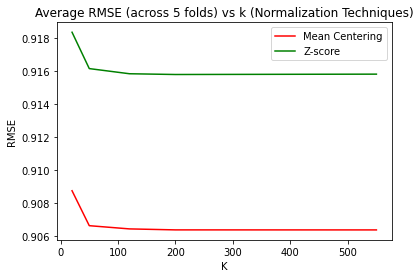

In [51]:

plt.plot(K_list, gs_mean_centering_mean_test_rmse, color='r', label='Mean Centering')
plt.plot(K_list, gs_z_score_mean_test_rmse, color='g', label='Z-score')

plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("Average RMSE (across 5 folds) vs k (Normalization Techniques)")
  
plt.legend()  
plt.show()

Analysis of the  effect of two normalization techniques: 
(i) Mean-Centering, and (ii) Z-Score Normalization

*Z-score normalization is comparatively better then Mean Centering. This could be attributed to the fact that spread of individual rating scale is considered in Z-score normalization*


#Similarity Measures

In an item-item collaborative filtering setting using k-NearestNeighbors, experiment with the following similarity measures:

a. Cosine Similarity

b. Pearson Correlation

c. Adjusted Cosine

Use 5-fold cross-validation and experiment with at least three values of k. Plot the average RMSE (across 5 folds) vs k values for the above similarity measures in a single plot

In [52]:
param_grid_similarity_1 = {'k': K_list,
              'sim_options': {'name':  ['cosine', 'pearson','pearson_baseline'],                            
                              'user_based': [False]
                             }
              }

print(param_grid_similarity_1)

{'k': [20, 50, 120, 200, 550], 'sim_options': {'name': ['cosine', 'pearson', 'pearson_baseline'], 'user_based': [False]}}


In [53]:
gs_knn_similarty_1 = GridSearchCV(KNNWithZScore, param_grid_similarity_1, measures=['rmse'], cv=FOLD_CNT, refit=True)
gs_knn_similarty_1.fit(Train_Data)

Computing the cosine similarity matrix...


/usr/local/lib/python3.7/dist-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning:

invalid value encountered in double_scalars



Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing th

In [ ]:
#Testing will happen with best parameters as refit is set to "True"
gs_knn_similarty_1_predictions = gs_knn_similarty_1.test(TestSet, verbose=True)


In [55]:
print("RMSE for Test Set ",accuracy.rmse(gs_knn_similarty_1_predictions, verbose=False) )

RMSE for Test Set  1.4020951548368843


In [56]:
print(gs_knn_similarty_1.cv_results)
print("Best RMSE score  ", gs_knn_similarty_1.best_score['rmse'])
print(" K parameter that gave the best RMSE score ",gs_knn_similarty_1.best_params['rmse'])


{'split0_test_rmse': array([0.9360406 , 0.96882313, 0.98009618, 0.93306439, 0.96872957,
       0.97970007, 0.93229698, 0.96872394, 0.97966487, 0.9321869 ,
       0.96872397, 0.97966388, 0.9321556 , 0.96872413, 0.97966416]), 'split1_test_rmse': array([0.92363521, 0.95849465, 0.96723891, 0.92039516, 0.95842499,
       0.96685227, 0.91957809, 0.95841996, 0.9668429 , 0.91940972,
       0.95841926, 0.96684099, 0.91936536, 0.95841925, 0.96684016]), 'split2_test_rmse': array([0.92606631, 0.96041226, 0.97267502, 0.92285283, 0.96033815,
       0.97233158, 0.92214144, 0.96031584, 0.97230219, 0.92207807,
       0.9603165 , 0.9722979 , 0.92205277, 0.96031676, 0.97229841]), 'split3_test_rmse': array([0.92228095, 0.95949338, 0.9671193 , 0.91852089, 0.95946443,
       0.96679622, 0.91829152, 0.95945744, 0.96677154, 0.91828497,
       0.95945788, 0.9667696 , 0.91826709, 0.95945765, 0.96676993]), 'split4_test_rmse': array([0.91940252, 0.95752023, 0.9661106 , 0.9158545 , 0.95742241,
       0.96572828, 0

In [57]:
#Storing for plotting
gs_knn_similarty_1_mean_test_rmse=gs_knn_similarty_1.cv_results['mean_test_rmse']
cosine_similarity_mean_rmse=gs_knn_similarty_1_mean_test_rmse[0::3] #0, 3, 6 ,.. index elements
pearson_similarity_mean_rmse=gs_knn_similarty_1_mean_test_rmse[1::3] #1, 4,7..... index elements
pearson_baseline_similarity_mean_rmse=gs_knn_similarty_1_mean_test_rmse[2::3] #2,,5,8.. index elements


print("cosine_similarity_mean_rmse : ", cosine_similarity_mean_rmse)
print("pearson_similarity_mean_rmse : ",pearson_similarity_mean_rmse)
print("pearson_baseline_similarity_mean_rmse : ",pearson_baseline_similarity_mean_rmse)



cosine_similarity_mean_rmse :  [0.92548512 0.92213756 0.92149342 0.92140871 0.92137602]
pearson_similarity_mean_rmse :  [0.96094873 0.96087591 0.96086641 0.96086641 0.96086647]
pearson_baseline_similarity_mean_rmse :  [0.970648   0.97028168 0.97025399 0.97025214 0.97025218]


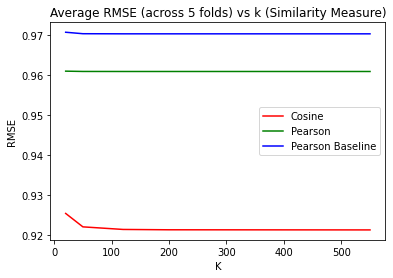

In [58]:
plt.plot(K_list, cosine_similarity_mean_rmse, color='r', label='Cosine')
plt.plot(K_list, pearson_similarity_mean_rmse, color='g', label='Pearson')
plt.plot(K_list, pearson_baseline_similarity_mean_rmse, color='b', label='Pearson Baseline')

plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("Average RMSE (across 5 folds) vs k (Similarity Measure)")
  
plt.legend()  
plt.show()

#Factorization Techniques 
Compare the performance of factoring 

(1) the similarity matrix (using Eigen
Decomposition) and 

(2) the rating matrix (using Singular Value Decomposition) for the
assigned dataset and report your observations

###SVD

In [59]:
from surprise import SVD

In [67]:
param_grid_svd = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}

gsSVD = GridSearchCV(SVD, param_grid_svd, measures=['rmse', 'mae'], cv=FOLD_CNT , refit=True )
gsSVD.fit(Train_Data)



In [68]:

print("Best RMSE on train data " , gsSVD.best_score['rmse'])
print("Best parameters " ,gsSVD.best_params['rmse'])

Best RMSE on train data  0.8640353940807441
Best parameters  {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [69]:
print(gsSVD.cv_results)
print("Best RMSE score using SVD ", gsSVD.best_score['rmse'])
print(" parameters that gave the best RMSE score  for SVD ",gsSVD.best_params['rmse'])


{'split0_test_rmse': array([0.89048714, 0.89167804, 0.88208332, 0.88279245, 0.88371628,
       0.88414746, 0.87790027, 0.87903845]), 'split1_test_rmse': array([0.87725176, 0.87722116, 0.8680411 , 0.86864732, 0.86922747,
       0.87059555, 0.86382343, 0.86468008]), 'split2_test_rmse': array([0.86028429, 0.8603739 , 0.85076626, 0.85164191, 0.85270921,
       0.85340235, 0.84706096, 0.84781294]), 'split3_test_rmse': array([0.88277511, 0.88329897, 0.87378336, 0.87527648, 0.87571787,
       0.87667146, 0.87029608, 0.87205294]), 'split4_test_rmse': array([0.87308451, 0.87319456, 0.8648668 , 0.86572909, 0.8658866 ,
       0.86709718, 0.86109623, 0.86210744]), 'mean_test_rmse': array([0.87677656, 0.87715333, 0.86790817, 0.86881745, 0.86945149,
       0.8703828 , 0.86403539, 0.86513837]), 'std_test_rmse': array([0.01009767, 0.01044951, 0.01037849, 0.01040755, 0.01035195,
       0.01027803, 0.01027858, 0.01049372]), 'rank_test_rmse': array([7, 8, 3, 4, 5, 6, 1, 2]), 'split0_test_mae': array([0.5

In [70]:
gsSVD_predictions = gsSVD.test(TestSet, verbose=True)


Streaming output truncated to the last 5000 lines.
user: 1590449    item: 195431     r_ui = 4.00   est = 4.63   {'was_impossible': False}
user: 1344980    item: 120891     r_ui = 5.00   est = 4.63   {'was_impossible': False}
user: 740255     item: 299373     r_ui = 5.00   est = 4.57   {'was_impossible': False}
user: 973809     item: 344214     r_ui = 2.00   est = 4.63   {'was_impossible': False}
user: 117122     item: 57051      r_ui = 2.00   est = 4.63   {'was_impossible': False}
user: 818380     item: 132826     r_ui = 0.00   est = 4.68   {'was_impossible': False}
user: 1814950    item: 187172     r_ui = 5.00   est = 4.63   {'was_impossible': False}
user: 172760     item: 183328     r_ui = 5.00   est = 4.63   {'was_impossible': False}
user: 174808     item: 364645     r_ui = 5.00   est = 4.63   {'was_impossible': False}
user: 952865     item: 446293     r_ui = 5.00   est = 4.63   {'was_impossible': False}
user: 1073245    item: 350876     r_ui = 4.00   est = 4.63   {'was_impossible':

In [73]:
print("RMSE on Test Set (SVD) ", accuracy.rmse(gsSVD_predictions , verbose = False))

RMSE on Test Set (SVD)  1.388361322621563


###Eigen Value Decomposition 

(On very small subset of Dataset )

Issue with using complete dataset 

1. It was leading to memory overrun

2. Not present in surprise library, thus I implemented it for small part of dataset

In [25]:
reduced_cnt1_vvs = TrainDF['user_id'].value_counts()
TrainDF_VVS = TrainDF[TrainDF['user_id'].isin(reduced_cnt1_vvs[reduced_cnt1_vvs >= 200].index)]

reduced_cnt1_vvs_2 = TrainDF_VVS['recipe_id'].value_counts()
TrainDF_VVS = TrainDF_VVS[TrainDF_VVS['recipe_id'].isin(reduced_cnt1_vvs_2[reduced_cnt1_vvs_2 >= 100].index)]

In [26]:
TrainDF_VVS

,user_id,recipe_id,rating
3094,28649,22782,4.0
3234,8629,22782,4.0
3942,29014,22782,5.0
4363,38643,22782,5.0
4539,35140,22782,5.0
...,...,...,...
684397,620763,95222,4.0
689528,128473,95222,4.0
691657,1056692,95222,3.0
697000,227652,22782,5.0


Creating User Rating Matrix

In [27]:
#RATING MATRIX

RATING_MATRIX = TrainDF_VVS.pivot(index='user_id', columns='recipe_id').rating
user_id = RATING_MATRIX .index
recipe_id = RATING_MATRIX.columns
print(RATING_MATRIX.shape)
RATING_MATRIX

(405, 8)


recipe_id,22782,27208,28148,68955,69173,77397,87782,95222
user_id,,,,,,,,
1535,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4291,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN
4439,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN
4470,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN
4740,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1706426,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
2123645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2324285,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN


In [28]:
from scipy.spatial.distance import pdist, squareform

In [29]:
RATING_MATRIX_ARRAY= RATING_MATRIX.to_numpy()
RATING_MATRIX_ARRAY.shape

(405, 8)

Defining function for cosine similarity

In [30]:
import math
def cosine_sim(X,Y):
  #print(X);

  NAN_index_X= np.where(np.isnan(X))
  NAN_index_Y= np.where(np.isnan(Y))

  #print(NAN_index_X)
  #print(NAN_index_Y)


  for i in NAN_index_X:
      X[i]=0;

  # Insert the elements of arr1[] to set hs
  for j in NAN_index_Y:
      Y[j]=0;


  #print(X)
  #print(Y)


  Numerator= np.dot(X,Y);

  Denominator = math.sqrt(sum(np.power(X, 2))) * math.sqrt(sum(np.power(Y, 2)));

  if Denominator==0:
    return 0
  else:
    return Numerator/Denominator 




In [33]:
dist_condense_RM_A = pdist(RATING_MATRIX_ARRAY,cosine_sim )
#dist_condense_RM_A

In [34]:
similarity_cosine_mat = squareform(dist_condense_RM_A)

In [35]:
similarity_cosine_mat.shape

(405, 405)

In [36]:
#writing similarity matrix to CSV
similarity_cosine_mat


array([[0.        , 0.        , 0.37139068, ..., 0.78086881, 0.40160966,
        0.70710678],
       [0.        , 0.        , 0.65653216, ..., 0.4417261 , 0.45436947,
        0.5       ],
       [0.37139068, 0.65653216, 0.        , ..., 0.87002219, 0.44746225,
        0.91914503],
       ...,
       [0.78086881, 0.4417261 , 0.87002219, ..., 0.        , 0.51431132,
        0.99388373],
       [0.40160966, 0.45436947, 0.44746225, ..., 0.51431132, 0.        ,
        0.51116565],
       [0.70710678, 0.5       , 0.91914503, ..., 0.99388373, 0.51116565,
        0.        ]])

Storing Similarity Matrix in CSV file (to avoid recomputation in future)

In [37]:
import csv

Cos_sim_file = "/content/drive/MyDrive/RS/SimMatrix/CosineSimilarity.csv"
with open(Cos_sim_file,"w") as my_csv_cos_sim:
    csvWriter = csv.writer(my_csv_cos_sim,delimiter=',')
    csvWriter.writerows(similarity_cosine_mat)

Reading Similarity Matrix from CSV file

In [38]:
with open(Cos_sim_file) as FN:
    cosine_sim_mat_read = np.loadtxt(FN, delimiter=",")

print(cosine_sim_mat_read)

[[0.         0.         0.37139068 ... 0.78086881 0.40160966 0.70710678]
 [0.         0.         0.65653216 ... 0.4417261  0.45436947 0.5       ]
 [0.37139068 0.65653216 0.         ... 0.87002219 0.44746225 0.91914503]
 ...
 [0.78086881 0.4417261  0.87002219 ... 0.         0.51431132 0.99388373]
 [0.40160966 0.45436947 0.44746225 ... 0.51431132 0.         0.51116565]
 [0.70710678 0.5        0.91914503 ... 0.99388373 0.51116565 0.        ]]


Calculating Eigen values and Eigen vectors of similarity matrix

In [39]:
from numpy import linalg as lg

Eigenvalues, Eigenvectors = lg.eigh( cosine_sim_mat_read)

Lambda = np.diag(Eigenvalues)
#print(Eigenvalues)

#Eigenvectors @ Lambda @ lg.inv(Eigenvectors)


#Sorting Eigen vector based on eigen values

idx = np.argsort(Eigenvalues)[::-1]
#print(idx)
Eigenvalues_sorted = Eigenvalues[idx]
Eigenvectors_sorted= Eigenvectors[:,idx]



In [40]:
print(len(Eigenvalues_sorted))

405


In [41]:
K_latent_factor=15

Separating K pincipal eigen vectors

In [42]:
V_k=Eigenvectors_sorted[0:K_latent_factor]

In [43]:
V_k.shape

(15, 405)

In [44]:
#Transposing as eigen vectors were stacked row wise
V_k_final=V_k.T

In [45]:
V_k_final.shape

(405, 15)

Prediction phase

In [46]:
retrieving_item_ids = RATING_MATRIX.columns
retrieving_item_ids

Int64Index([22782, 27208, 28148, 68955, 69173, 77397, 87782, 95222], dtype='int64', name='recipe_id')

In [47]:

X=[];

for item_id in retrieving_item_ids:

  #item_id=27208;

  r_i=RATING_MATRIX[item_id];

  #print(r_i)

  #print(type(r_i))

  r_i_arr=r_i.to_numpy();
  #print(r_i_arr)
  #print(type(r_i_arr))

  r_i_proj = np.dot(r_i_arr,V_k_final)

  #print(r_i_proj)

  #print(type(r_i_proj))

  X.append(r_i_proj)


In [48]:
#print(X)
X=np.array(X)
X.shape

(8, 15)

Generating clusters of items in subspace

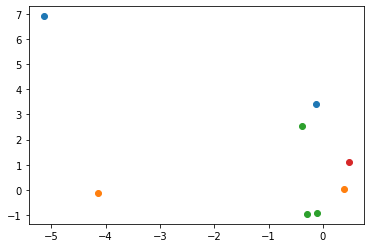

In [49]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot


model = AgglomerativeClustering(n_clusters=4)

yhat = model.fit_predict(X) # Getting cluster no. of items

clusters = unique(yhat)

for cluster in clusters:
  
  R_I_X = where(yhat == cluster)
 
  pyplot.scatter(X[R_I_X, 0], X[R_I_X, 1])
  
pyplot.show()

In [52]:
#suppose we want to predict missing ratings for item ID =95222

print("Cluster no. (corresponding to item id) : ", yhat)
print("All item IDs : ")
print(retrieving_item_ids)
test_recipe_id = 95222

retrieving_item_ids=list(retrieving_item_ids)
cluster_no_test_id=yhat[retrieving_item_ids.index(test_recipe_id)]

print("Cluster no. (test item id) :", cluster_no_test_id)

#finding neighbours of test_recipe

neighbours=[]

for i  in range(0,len(retrieving_item_ids)):
  if yhat[i]==cluster_no_test_id and retrieving_item_ids[i] !=test_recipe_id :
    neighbours.append(retrieving_item_ids[i])
    #print(i)


print("Recipe that belong to same cluster as Recipe (", test_recipe_id, " ) : ",neighbours )



Cluster no. (corresponding to item id) :  [0 1 3 2 0 1 2 2]
All item IDs : 
[22782, 27208, 28148, 68955, 69173, 77397, 87782, 95222]
Cluster no. (test item id) : 2
Recipe that belong to same cluster as Recipe ( 95222  ) :  [68955, 87782]


In [53]:
#Let's take a look at columns of rating of RATING_MATRIX corresponding to neighbours

print("\nRecipe ID : ",test_recipe_id)
print(RATING_MATRIX[test_recipe_id])



for N in neighbours:
  print("\nRecipe ID : ", N)
  print(RATING_MATRIX[N])



Recipe ID :  95222
user_id
1535          0.0
4291          0.0
4439          0.0
4470          0.0
4740          0.0
             ... 
1706426       0.0
2123645       5.0
2324285       0.0
2549237       4.0
1800054678    0.0
Name: 95222, Length: 405, dtype: float64

Recipe ID :  68955
user_id
1535          0.0
4291          0.0
4439          0.0
4470          5.0
4740          0.0
             ... 
1706426       0.0
2123645       0.0
2324285       0.0
2549237       4.0
1800054678    0.0
Name: 68955, Length: 405, dtype: float64

Recipe ID :  87782
user_id
1535          0.0
4291          0.0
4439          0.0
4470          5.0
4740          0.0
             ... 
1706426       0.0
2123645       0.0
2324285       0.0
2549237       5.0
1800054678    0.0
Name: 87782, Length: 405, dtype: float64


Observation (for testing purpose ) 

Rating for user_id= 2549237 for our test_recipe_id 

***Let's predict the rating***

METHOD - Rating of user u for an item i is evaluated as the mean of ratings given by u for items in the same cluster as i (i.e recipe_id's in neighbour set).

In [55]:
test_user_id=2549237 
S=0;
for N in neighbours:
  S=S+RATING_MATRIX.at[test_user_id,N];
  #print(RATING_MATRIX.at[test_user_id,N])

predicted_rating=S/len(neighbours);

print("Predicted rating for test_user_id (", test_user_id ,")  and test_recipe_id (", test_recipe_id ,")   = " , predicted_rating)


Predicted rating for test_user_id ( 2549237 )  and test_recipe_id ( 95222 )   =  4.5


**Compare the performance of factoring (1) the similarity matrix (using Eigen Decomposition) and (2) the rating matrix (using Singular Value Decomposition)**




Eigen Decomposition is used for factorisation of sparse similarity matrix (real symmetric sqaure matrix) and SVD is used for factorisation of user rating matrix.

For machine learning tasks, eigenvalue decomposition is considered less stable comapared to SVD. Thus, SVD is preferred.



####References
https://surprise.readthedocs.io/en/stable/getting_started.html#grid-search-note
https://surprise.readthedocs.io/en/stable/matrix_factorization.html?highlight=SVD
